In [2]:
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
import openpyxl


In [4]:
'upload file from pc'
uploaded = files.upload()


Saving tehran1.csv to tehran1.csv
Saving tehran2.csv to tehran2.csv
Saving tehran3.csv to tehran3.csv
Saving tehran4.csv to tehran4.csv
Saving tehran5.csv to tehran5.csv
Saving tehran6.csv to tehran6.csv
Saving tehran7.csv to tehran7.csv
Saving tehran8.csv to tehran8.csv
Saving tehran9.csv to tehran9.csv
Saving tehran10.csv to tehran10.csv
Saving tehran11.csv to tehran11.csv
Saving tehran12.csv to tehran12.csv
Saving tehran13.csv to tehran13.csv
Saving tehran14.csv to tehran14.csv
Saving tehran15.csv to tehran15.csv


In [5]:
data=[]
for num in range(1,16):
   report= pd.read_csv(io.BytesIO(uploaded['tehran%s.csv'%num]))
   report=report.replace(r'^\s*$', np.nan, regex=True)
   data.append(report)   

In [369]:
for num in range(1,16):
  d=data[num-1]['date']
  print('data set%s is from'%num,data[num-1]['date'][len(d)-1],'until', data[num-1]['date'][0])

data set1 is from 2018/12/29 until 2021/6/1
data set2 is from 2018/9/29 until 2021/6/1
data set3 is from 2018/6/14 until 2021/6/1
data set4 is from 2019/9/21 until 2021/6/1
data set5 is from 2015/6/11 until 2021/6/1
data set6 is from 2019/9/13 until 2021/6/1
data set7 is from 2018/9/22 until 2021/6/1
data set8 is from 2018/6/7 until 2021/6/1
data set9 is from 2018/8/29 until 2021/6/1
data set10 is from 2018/10/14 until 2021/6/1
data set11 is from 2015/6/23 until 2021/6/1
data set12 is from 2018/9/8 until 2021/6/1
data set13 is from 2018/10/5 until 2021/6/1
data set14 is from 2016/1/2 until 2020/1/1
data set15 is from 2016/10/15 until 2017/4/6


In [284]:
for num in range(1,15):
 for index in data[num-1].index:
    if type(data[num-1].loc[index,'date'])!=float:
        try:
            data[num-1].loc[index,'year']=int(data[num-1].loc[index,'date'].split()[1].replace(',',''))
            data[num-1].loc[index,'Month']=data[num-1].loc[index,'date'].split()[0]
            data[num-1].loc[index,'day']=data[num-1].loc[index,'date'].split()[2]
        except:
            data[num-1].loc[index,'year']=int(data[num-1].loc[index,'date'].split('/')[0])
            data[num-1].loc[index,'Month']=data[num-1].loc[index,'date'].split('/')[1]
            data[num-1].loc[index,'day']=data[num-1].loc[index,'date'].split('/')[2]
            
#  data[num-1].drop('date',axis=1,inplace=True)

list of time

In [285]:
def make_list(num):
  st=[] 
  for i in range(data[num].shape[0]):
     
      st.append(data[num].iloc[i]['date'].replace('/','-'))


  return st      

In [286]:
org_time_lst=[]
for num in range(0,13):
  org_time_lst.append(make_list(num))

In [187]:
maxi_len=len(org_time_lst[12])

i will use data set 1 to 13 because they support untill 2021

fiil nan with median

In [11]:
for num in range(0,14):
   data[num]=data[num].fillna(data[num].median())

In [12]:
data[2]

,date,pm25,pm10,o3,no2,so2,co,year,Month,day
0,2021/6/1,66,41,22,33,12,31,2021.0,6,1
1,2021/6/2,73,52,22,38,15,21,2021.0,6,2
2,2021/6/5,64,45,22,18,13,11,2021.0,6,5
3,2021/6/6,73,49,22,22,14,20,2021.0,6,6
4,2021/6/7,70,43,22,29,14,25,2021.0,6,7
...,...,...,...,...,...,...,...,...,...,...
764,2018/6/9,77,52,22,38,33,21,2018.0,6,9
765,2018/6/10,77,52,22,38,33,21,2018.0,6,10
766,2018/6/12,77,52,22,38,31,21,2018.0,6,12
767,2018/6/13,77,52,22,38,31,21,2018.0,6,13


In [13]:
col_list=list(data[2].columns)
col_list

['date',
 ' pm25',
 ' pm10',
 ' o3',
 ' no2',
 ' so2',
 ' co',
 'year',
 'Month',
 'day']

same columns for all data sets

In [14]:
col_list=list(data[2].columns)
for num in range(0,14):
  list_difference = [item for item in col_list if item not in data[num].columns]
  for i in range(len(list_difference)):
       data[num][list_difference[i]]=0

In [15]:
data[0]

,date,pm25,pm10,o3,no2,co,year,Month,day,so2
0,2021/6/1,64,58,15,12,30,2021.0,6,1,0
1,2021/6/2,77,58,15,12,30,2021.0,6,2,0
2,2021/6/5,77,58,15,12,30,2021.0,6,5,0
3,2021/6/6,88,58,15,12,30,2021.0,6,6,0
4,2021/6/7,87,58,15,12,30,2021.0,6,7,0
...,...,...,...,...,...,...,...,...,...,...
929,2018/12/11,87,64,15,12,35,2018.0,12,11,0
930,2018/12/13,87,61,15,12,38,2018.0,12,13,0
931,2018/9/11,87,60,15,102,36,2018.0,9,11,0
932,2019/11/28,87,58,15,12,19,2019.0,11,28,0


# make new data frame

all date from 9/1/2019 until 6/23/2021

In [387]:
start='9/1/2018'
end='6/23/2021'
time=pd.date_range(start=start,end=end)

In [388]:
deltat=len(time)
deltat

1027

In [389]:
date_list=[]
for i in range(deltat):
  a=str(time[i]).replace(' 00:00:00','')
  a=a.replace('01','1')
  a=a.replace('02','2')
  a=a.replace('03','3')
  a=a.replace('04','4')
  a=a.replace('05','5')
  a=a.replace('06','6')
  a=a.replace('07','7')
  a=a.replace('08','8')
  a=a.replace('09','9')
  a=a.replace('221','2021')
  a=a.replace('220','2020')
  a=a.replace('219','2019')
  a=a.replace('218','2018')
  date_list.append(a)
    

In [ ]:
date_list

In [391]:
df = pd.DataFrame(columns = ['date','pm25', 'pm10', 'o3', 'no2', 'so2', 'co']) 
df['date']=time

In [392]:
df['year']=df['date'].dt.year
df['month'] = df['date'].dt.month
df['day']=df['date'].dt.day
df=df.fillna(0)
df

,date,pm25,pm10,o3,no2,so2,co,year,month,day
0,2018-09-01,0,0,0,0,0,0,2018,9,1
1,2018-09-02,0,0,0,0,0,0,2018,9,2
2,2018-09-03,0,0,0,0,0,0,2018,9,3
3,2018-09-04,0,0,0,0,0,0,2018,9,4
4,2018-09-05,0,0,0,0,0,0,2018,9,5
...,...,...,...,...,...,...,...,...,...,...
1022,2021-06-19,0,0,0,0,0,0,2021,6,19
1023,2021-06-20,0,0,0,0,0,0,2021,6,20
1024,2021-06-21,0,0,0,0,0,0,2021,6,21
1025,2021-06-22,0,0,0,0,0,0,2021,6,22


In [ ]:
org_time_lst[2] 

In [180]:
a=data[2][' pm25'][8]
type(a)

str

In [119]:
col_list=list(data[2].columns)
col_list

['date',
 ' pm25',
 ' pm10',
 ' o3',
 ' no2',
 ' so2',
 ' co',
 'year',
 'Month',
 'day']

In [394]:
start='2018-9-1'
for num in range(0,13):
  if start in org_time_lst[num]:
    print(num)

1
2
3
4
5
6
7
8
9
10
11
12


In [395]:
pm25_col=np.zeros((deltat))
pm10_col=np.zeros((deltat))
co_col=np.zeros((deltat))
so2_col=np.zeros((deltat))
no2_col=np.zeros((deltat))
o3_col=np.zeros((deltat))

itr_pm25=np.zeros((deltat))
itr_pm10=np.zeros((deltat))
itr_co=np.zeros((deltat))
itr_so2=np.zeros((deltat))
itr_no2=np.zeros((deltat))
itr_o3=np.zeros((deltat))

for num in range(0,13):

 for i in range(deltat):

  if i<len(org_time_lst[num]):
   if  date_list[i] in org_time_lst[num]:
    
    # print(num,org_time_lst[num][i],i)
    pm25=int(data[num][' pm25'][i])
    pm25_col[i]+=(pm25)
    ## if 
    if pm25!=0:
      itr_pm25[i]+=1
    pm10=int(data[num][' pm10'][i])
    pm10_col[i]+=(pm10)
    if pm10!=0:
      itr_pm10[i]+=1
    co=int(data[num][' co'][i])
    co_col[i]+=(co)
    if co!=0:
      itr_co[i]+=1    
    so2=int(data[num][' so2'][i])
    so2_col[i]+=(so2)
    if so2!=0:
      itr_so2[i]+=1
    no2=int(data[num][' no2'][i])
    no2_col[i]+=(no2)
    if no2!=0:
      itr_no2[i]+=1    
    o3=int(data[num][' o3'][i])
    o3_col[i]+=(o3)
    if o3!=0:
      itr_o3[i]+=1    

In [396]:
itr=[itr_pm25,itr_pm10,itr_co,itr_so2,itr_no2,itr_o3]
for i in range(len(itr)):
  for j in range(deltat):
   if itr[i][j]==0:
    itr[i][j]=1

In [397]:
co=co_col/itr_co
df['co']=co
no2=no2_col/itr_no2
df['no2']=no2
o3=o3_col/itr_o3
df['o3']=o3
pm10=pm10_col/itr_pm10
df['pm10']=pm10
pm25=pm25_col/itr_pm25
df['pm25']=pm25
so2=so2_col/itr_so2
df['so2']=so2

In [145]:
# aqi_s=[co,no2,o3,pm10,pm25,so2]
# AQI=np.zeros((deltat))
# for i in range(deltat):
#   AQI[i]=max(co[i],no2[i],o3[i],pm10[i],pm25[i],so2[i])

In [85]:
# df['AQI']=AQI

In [398]:
X_data=df.drop(columns=['date'],inplace=True)
df

,pm25,pm10,o3,no2,so2,co,year,month,day
0,60.916667,46.600000,53.857143,48.250000,12.000000,24.181818,2018,9,1
1,72.000000,59.400000,53.857143,46.250000,15.222222,24.909091,2018,9,2
2,68.000000,52.800000,53.857143,36.166667,12.444444,19.727273,2018,9,3
3,77.333333,57.200000,53.857143,41.583333,13.666667,23.818182,2018,9,4
4,70.833333,50.200000,53.857143,47.500000,13.444444,23.909091,2018,9,5
...,...,...,...,...,...,...,...,...,...
1022,79.250000,64.333333,31.000000,36.500000,9.000000,20.250000,2021,6,19
1023,76.750000,77.000000,31.500000,44.000000,11.750000,23.250000,2021,6,20
1024,110.000000,83.666667,29.000000,54.500000,18.250000,27.250000,2021,6,21
1025,108.000000,82.000000,27.500000,47.000000,13.000000,23.000000,2021,6,22


In [399]:
df=df.replace(0,np.nan)
df=df.fillna(df.mean())

In [400]:
df.to_csv('final_X_dat.csv')

In [401]:
df['AQI'] = df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].max(axis=1)

In [402]:
aqi_list=df['AQI']
Y_data=aqi_list

In [403]:
aqi_list

0        60.916667
1        72.000000
2        68.000000
3        77.333333
4        70.833333
           ...    
1022     79.250000
1023     77.000000
1024    110.000000
1025    108.000000
1026    104.000000
Name: AQI, Length: 1027, dtype: float64

In [404]:
aqi_class=np.zeros((len(aqi_list)))
for i in range(len(aqi_list)):
  if aqi_list[i]<=50:
    aqi_class[i]=0
  if aqi_list[i]>50 and aqi_list[i]<=100:
    aqi_class[i]=1
  if aqi_list[i]>100 and aqi_list[i]<=150:
    aqi_class[i]=2  
  if aqi_list[i]>150 and aqi_list[i]<=200:
    aqi_class[i]=3
  if aqi_list[i]>200 and aqi_list[i]<=300:
    aqi_class[i]=4
  if aqi_list[i]>300 and aqi_list[i]<=500:
    aqi_class[i]=5
                      

In [405]:
df['aqi_class']=aqi_class
Y_data_class=aqi_class
df

,pm25,pm10,o3,no2,so2,co,year,month,day,AQI,aqi_class
0,60.916667,46.600000,53.857143,48.250000,12.000000,24.181818,2018,9,1,60.916667,1.0
1,72.000000,59.400000,53.857143,46.250000,15.222222,24.909091,2018,9,2,72.000000,1.0
2,68.000000,52.800000,53.857143,36.166667,12.444444,19.727273,2018,9,3,68.000000,1.0
3,77.333333,57.200000,53.857143,41.583333,13.666667,23.818182,2018,9,4,77.333333,1.0
4,70.833333,50.200000,53.857143,47.500000,13.444444,23.909091,2018,9,5,70.833333,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1022,79.250000,64.333333,31.000000,36.500000,9.000000,20.250000,2021,6,19,79.250000,1.0
1023,76.750000,77.000000,31.500000,44.000000,11.750000,23.250000,2021,6,20,77.000000,1.0
1024,110.000000,83.666667,29.000000,54.500000,18.250000,27.250000,2021,6,21,110.000000,2.0
1025,108.000000,82.000000,27.500000,47.000000,13.000000,23.000000,2021,6,22,108.000000,2.0


In [406]:
df.to_csv('final_dat_set_classification.csv')

# random forest classification

In [407]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
y=Y_data_class
X=X_data
X, y = make_classification(n_samples=1027, n_features=9,
                          n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [408]:
clf.predict(X)

array([0, 0, 1, ..., 1, 1, 1])

In [409]:
clf.predict_proba(X)

array([[0.78374591, 0.21625409],
       [0.78984737, 0.21015263],
       [0.28661711, 0.71338289],
       ...,
       [0.27139694, 0.72860306],
       [0.25638203, 0.74361797],
       [0.27908841, 0.72091159]])

In [410]:
clf.score(X,y)

0.9279454722492697

In [411]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y,shuffle=False)

# neural network

In [412]:
from tensorflow import keras as ks
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [422]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X, y,shuffle=False)

In [431]:
model = Sequential()
model.add(Dense(8, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 80        
_________________________________________________________________
dense_22 (Dense)             (None, 6)                 54        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 7         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [432]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [433]:
history = model.fit(X_train, Y_train, epochs=250, batch_size=100,  verbose=1, validation_split=0.2)

Epoch 1/250
7/7 [==============================] - 1s 47ms/step - loss: 0.4179 - accuracy: 0.5688 - val_loss: 0.0132 - val_accuracy: 0.9870
Epoch 2/250
7/7 [==============================] - 0s 5ms/step - loss: 0.4069 - accuracy: 0.5672 - val_loss: 0.0138 - val_accuracy: 0.9870
Epoch 3/250
7/7 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.5659 - val_loss: 0.0149 - val_accuracy: 0.9870
Epoch 4/250
7/7 [==============================] - 0s 6ms/step - loss: 0.3372 - accuracy: 0.6175 - val_loss: 0.0165 - val_accuracy: 0.9870
Epoch 5/250
7/7 [==============================] - 0s 7ms/step - loss: 0.3597 - accuracy: 0.5763 - val_loss: 0.0188 - val_accuracy: 0.9870
Epoch 6/250
7/7 [==============================] - 0s 6ms/step - loss: 0.3276 - accuracy: 0.5965 - val_loss: 0.0219 - val_accuracy: 0.9870
Epoch 7/250
7/7 [==============================] - 0s 6ms/step - loss: 0.3340 - accuracy: 0.5702 - val_loss: 0.0258 - val_accuracy: 0.9870
Epoch 8/250
7/7 [=========

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


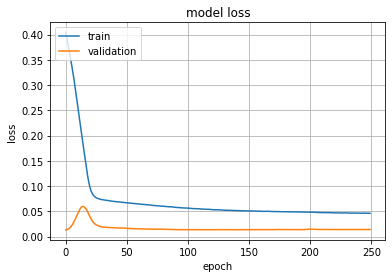

In [434]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('loss_final.png',dpi=800)
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


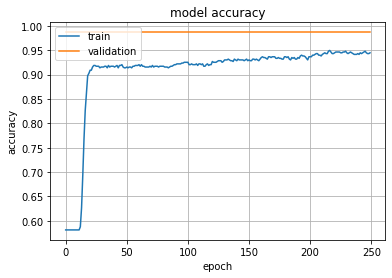

In [435]:
print(history.history.keys())
# "accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.savefig('accuracy_final.png',dpi=800)
plt.show()

# linear regression

In [333]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, max_error

In [334]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)# fit train data
score=reg.score(X_test,Y_test)
print('score=',score)
coef=reg.coef_

score= -19.000853953688985


In [335]:
predict= reg.predict(X_test)

In [336]:
mean_squared_error(Y_test, predict)

0.21199884739177996

In [340]:
from sklearn.model_selection import learning_curve
ns_list=[100,200,400,600]
ns_list,train_scores, valid_scores = learning_curve(LinearRegression(), X_train, Y_train,train_sizes = ns_list, scoring='neg_mean_squared_error')

train_scores_mean =-np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

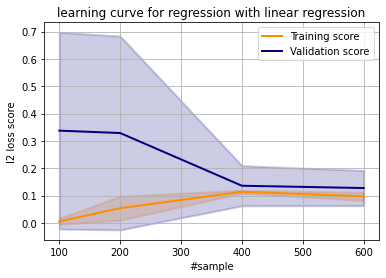

In [341]:
#plot
plt_title = 'learning curve for regression with linear regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='#sample', ylabel='l2 loss score', title=plt_title)
plt.plot(ns_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.plot(ns_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.savefig('learning_lin_l2_loss.png', dpi = 500)
# plt.savefig('learning_lin_l2_loss.eps', format='eps',dpi=300)
plt.grid()
plt.show()

# polynomial regression

In [326]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
X_train, X_test, Y_train, Y_test = train_test_split(X, y,shuffle=False)
polyreg=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
polyreg.fit(X_train,Y_train)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [327]:
polyreg.predict(X_test)
print(polyreg.score(X_test,Y_test))

-9.738129039039734


In [328]:
from sklearn.metrics import r2_score
# R2 (test)
r2_score(Y_test,polyreg.predict(X_test))

-9.738129039039734

In [329]:
#R2 (train)
r2_score(Y_train,polyreg.predict(X_train))

0.6594296402951756

In [330]:
# MSE(test)
mean_squared_error( polyreg.predict(X_test),Y_test)

0.1138186891765564

In [331]:
degrees = np.arange(1, 4)
from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(polyreg, X_train, Y_train,param_name='polynomialfeatures__degree',
                 param_range=degrees ,  scoring='neg_mean_squared_error' )
train_scores_mean =-np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =-np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

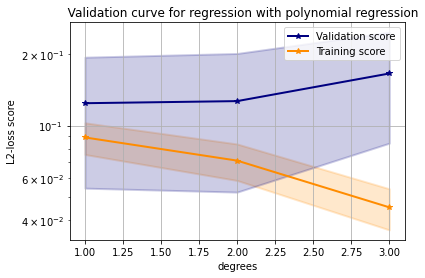

In [332]:
plt_title = '   Validation curve for regression with polynomial regression'#.format(k)
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='degrees', ylabel='L2-loss score', title=plt_title)

plt.semilogy(degrees, valid_scores_mean, label="Validation score",marker='*',
             color="navy", lw=2)
plt.semilogy(degrees, train_scores_mean, label="Training score",marker='*',
             color="darkorange", lw=2)
plt.fill_between(degrees, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)

plt.fill_between(degrees, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")

# plt.savefig('validation_poly_l2_loss.eps', format='eps',dpi=300)
plt.grid()

plt.savefig('validation_poly_l2_loss.png', dpi = 300)
plt.show()